This is the joint notbook

REQUIREMENT

Presentation:\
A. General overview of CRISP DM process to build a statistical model.\
B. Data understanding / descriptive analyses
>    1. histogram of volatilites of features
>    2. histogram of percentage of missing values of features
>    3. frequency distribution of target values
>    4. correlation heatmap

READ FILES

In [1]:
#this function is to read, transform and join 2 data frame
#%%
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

def read_secom():
    path = 'secom.data'
    df = pd.read_csv(path, delimiter=' ', header=None, na_values=['NaN'])
    df.columns = ['feature'+str(x+1) for x in range(len(df.columns))]
    return df


#%%
def read_labels():
    path = 'secom_labels.data'
    df = pd.read_csv(path, delimiter=' ', header=None, na_values=['NaN'])
    df.columns = ['status','timestamp']
    df['timestamp'] = pd.to_datetime(df['timestamp'],dayfirst=True)
    return df

#read 2 df 
df_data = read_secom()
df_label = read_labels()

#concat them vertically
df = pd.concat([df_data,df_label],axis=1)

df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590,status,timestamp
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1,2008-07-19 11:55:00
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1,2008-07-19 12:32:00
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1,2008-07-19 13:17:00
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1,2008-07-19 14:43:00
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1,2008-07-19 15:22:00


>1 histogram of volatilites of features

>2 histogram of percentage of missing values of feature

>3 frequency distribution of target values

>4 correlation heatmap

Text(0.5, 1.0, 'Correlation heatmap for the Features')

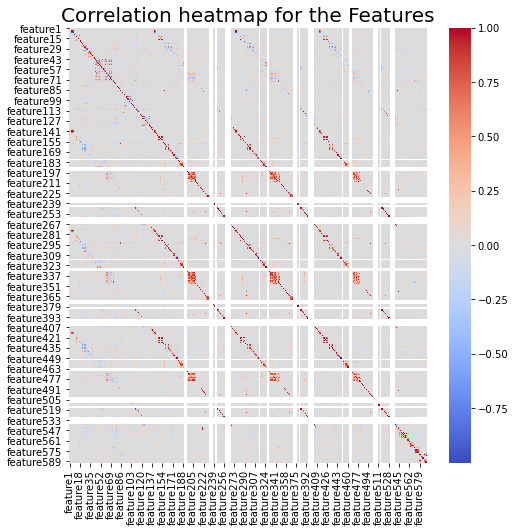

In [59]:
#this plot is just to show corr pattern, we cannot use it for any cleaning purpose
plt.rcParams['figure.figsize'] = (8, 8) #this is to set the size for the plot, making it bigger
sns.heatmap(df_data.corr(), cmap = "coolwarm")
plt.title('Correlation heatmap for the Features', fontsize = 20)

In [25]:
df_corr = df_data.corr()
df_corr

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
feature1,1.000000,-0.145071,0.004775,-0.007655,-0.011047,NaN,0.002281,0.031510,-0.052731,0.009052,...,-0.070137,-0.028380,0.000225,0.023469,0.019921,0.023605,0.018472,-0.025909,-0.028196,0.004177
feature2,-0.145071,1.000000,0.005802,-0.007603,-0.001641,NaN,-0.025702,-0.012084,0.031321,0.024015,...,0.073211,0.083463,0.043690,0.002905,-0.001264,0.002273,-0.009417,0.017290,0.010134,0.044834
feature3,0.004775,0.005802,1.000000,0.298935,0.095891,NaN,-0.136225,-0.273970,0.023609,0.016291,...,-0.018721,-0.010759,-0.006061,0.015711,0.018237,0.015765,-0.025548,-0.029479,-0.030943,-0.033226
feature4,-0.007655,-0.007603,0.298935,1.000000,-0.058483,NaN,-0.685835,0.138290,-0.103656,0.068998,...,-0.057051,-0.096619,0.009045,0.025461,0.024754,0.026043,0.034779,-0.039309,-0.033780,-0.081157
feature5,-0.011047,-0.001641,0.095891,-0.058483,1.000000,NaN,-0.074368,-0.916410,-0.026035,0.054619,...,-0.041290,0.088327,0.045361,-0.001301,-0.001598,-0.001617,-0.044016,-0.031145,-0.026204,0.051428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature586,0.023605,0.002273,0.015765,0.026043,-0.001617,NaN,-0.039569,0.010345,0.017930,-0.036132,...,-0.000395,-0.000673,-0.197363,0.999890,0.995342,1.000000,0.002744,-0.002931,-0.002531,-0.003801
feature587,0.018472,-0.009417,-0.025548,0.034779,-0.044016,NaN,-0.041296,0.058171,0.010436,0.033759,...,0.249926,-0.475397,-0.016726,0.002257,0.001606,0.002744,1.000000,0.167913,0.164238,-0.486559
feature588,-0.025909,0.017290,-0.029479,-0.039309,-0.031145,NaN,0.034184,-0.021472,0.022853,0.059341,...,0.975470,0.396369,-0.024481,-0.002650,-0.002498,-0.002931,0.167913,1.000000,0.974276,0.390813
feature589,-0.028196,0.010134,-0.030943,-0.033780,-0.026204,NaN,0.032359,-0.020962,0.026261,0.060803,...,1.000000,0.379167,-0.020712,-0.002261,-0.001957,-0.002531,0.164238,0.974276,1.000000,0.389211


In [39]:
#? if 2 features have high corr, do we remove both of them or just 1. If just 1, then which one do you remove?

dict_corr_pair = {}

#to understand the nested loop below, you should look at the top triangle of corr() matrix, we just need to loo through 1 of the 2 triangle because they are the same
 

for i in range(0, len(df_corr.columns)):
    for j in range(i+1,len(df_corr.columns)):
        dict_corr_pair[str(i)+';'+str(j)] = df_corr.iloc[i,j]

df_corr_pair = pd.DataFrame.from_dict(dict_corr_pair, orient='index')
df_corr_pair

,0
0;1,-0.145071
0;2,0.004775
0;3,-0.007655
0;4,-0.011047
0;5,NaN
...,...
586;588,0.164238
586;589,-0.486559
587;588,0.974276
587;589,0.390813


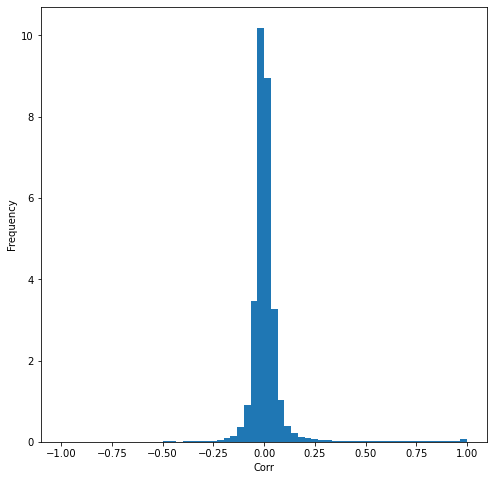

In [43]:
#plot histogran for the corr pair
plt.rcParams['figure.figsize'] = (8, 8)
plt.hist(df_corr_pair, density=True, bins=60)  # density=False would make counts
plt.ylabel('Frequency')
plt.xlabel('Corr');

In [46]:
#there are many pairs spawn from 590 features
df_corr_pair.shape

(173755, 1)

In [51]:
#create frequency table for the corr pairs
df_corr_pair.apply(lambda x: pd.cut(x, bins=[0,0.2,0.4,0.6,0.8,1]).value_counts()).add_prefix('count_')
#pd_cut will label the row with [a,b] which belong that row value

,count_0
"(0.0, 0.2]",52111
"(0.2, 0.4]",1016
"(0.8, 1.0]",644
"(0.4, 0.6]",469
"(0.6, 0.8]",385


APPENDIX

In [50]:
df_corr_pair.apply(lambda x: pd.cut(x, bins=[0,0.2,0.4,0.6,0.8,1]))

,0
0;1,NaN
0;2,"(0.0, 0.2]"
0;3,NaN
0;4,NaN
0;5,NaN
...,...
586;588,"(0.0, 0.2]"
586;589,NaN
587;588,"(0.8, 1.0]"
587;589,"(0.2, 0.4]"


In [26]:
# dictionary with list object in values
details = {
    'Name' : ['Ankit', 'Aishwarya', 'Shaurya', 'Shivangi'],
    'Age' : [23, 21, 22, 21],
    'University' : ['BHU', 'JNU', 'DU', 'BHU'],
}
  
# creating a Dataframe object from dictionary 
# with custom indexing
df1 = pd.DataFrame(details, index = ['a', 'b', 'c', 'd'])
df1

,Name,Age,University
a,Ankit,23,BHU
b,Aishwarya,21,JNU
c,Shaurya,22,DU
d,Shivangi,21,BHU


In [27]:
df1.iloc[0]

Name          Ankit
Age              23
University      BHU
Name: a, dtype: object

In [ ]:
unique_vals = df['status'].unique()
unique_vals

array([-1,  1])

In [ ]:
#produce general stats for each feature
df_data.describe()#

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,0.005396,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,0.003116,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.001000,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,0.003400,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,0.004700,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,0.006475,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,0.028600,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800
